In [72]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn




from DC3D_V3.Autoencoders.DC3D_Autoencoder_V1_Protected2_2 import Encoder, Decoder
encoder = Encoder(10, False)
decoder = Decoder(10, False)




path = 'N:\Yr 3 Project Results\RDT 500K 1000ToF timed - Training Results\Model_Deployment\RDT 500K 1000ToF timed - Model + Optimiser State Dicts.pth'
# load the state dictionaries into the models
full_state_dict = torch.load(path)
encoder.load_state_dict(full_state_dict['encoder_state_dict'])
decoder.load_state_dict(full_state_dict['decoder_state_dict'])

# Instantiate model
model = nn.Sequential(encoder, decoder)

# Put the model in evaluation mode
model.eval()







Sequential(
  (0): Encoder(
    (encoder_cnn): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace=True)
      (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
      (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): ReLU(inplace=True)
      (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
      (6): ReLU(inplace=True)
    )
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (encoder_lin): Sequential(
      (0): Linear(in_features=5632, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=10, bias=True)
    )
  )
  (1): Decoder(
    (decoder_lin): Sequential(
      (0): Linear(in_features=10, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=5632, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 16, 11))
    (decoder_conv): S

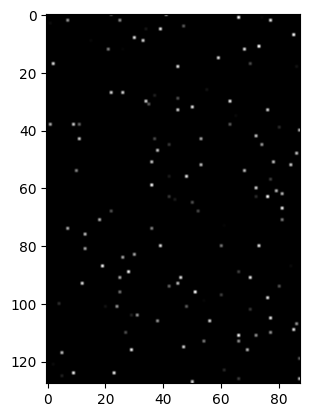

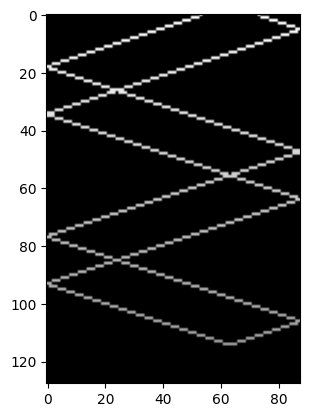

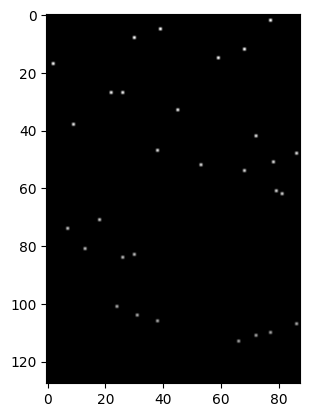

In [73]:
test_file1 = r"N:\Yr 3 Project Datasets\PERF VALIDATION SETS\10K 100N 30S\Data\0.npy .npy"
test_file1 = np.load(test_file1)

test_file2 = r"N:\Yr 3 Project Datasets\PERF VALIDATION SETS\10K 100N 30S\Labels\0.npy .npy"
test_file2 = np.load(test_file2)

test_file3 = r"N:\Yr 3 Project Datasets\PERF VALIDATION SETS\10K 100N 30S\Labels_Sparse\0.npy .npy"
test_file3 = np.load(test_file3)


plt.imshow(test_file1, cmap='gray')
plt.show()

plt.imshow(test_file2, cmap='gray')
plt.show()

plt.imshow(test_file3, cmap='gray')
plt.show()

In [74]:

# Add  extra dims to start of numpy array test_file1
test_file1 = np.expand_dims(test_file1, axis=2)

# duplicat ethe array so it has 3 channels
test_file1 = np.repeat(test_file1, 3, axis=2)


input_image = test_file1


In [75]:
from MapExtrackt import FeatureExtractor
fe = FeatureExtractor(model)


print(input_image.shape)
fe.set_image(input_image)

fe.display_from_map(layer_no=1)

(128, 88, 3)


RuntimeError: Given groups=1, weight of size [8, 1, 3, 3], expected input[1, 3, 136, 96] to have 1 channels, but got 3 channels instead